In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import PlotScatter,GetLineOfOptima,GetOptimalT
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import PlotScatter

In [7]:
from ClusterBasing import ClusterBasing

basefolder          = "../../AnalysisDataOrganized/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/";
outputfolder_window = basefolder+"Output/"+'2021_09_30__20_07_29/';

#basefolder = "../../AnalysisDataOrganized/Mike_190516_EGFR-P1-ATTO655_cell_3_MMImages.ome_locs_render_al_linked1sigma/";
#outputfolder_window = basefolder+'Output/2021_10_01__15_45_34/';

#basefolder = "../../AnalysisDataOrganized/Mike_190521_EGFR-P1-ATTO655_cell_3_MMImages.ome_locs_render_al_linked1simga/";
#outputfolder_window = basefolder+'Output/2021_10_01__17_13_18/';

CB = ClusterBasing(outputfolder_window);
CB.GetClusterings_InOutCell(skipSimilarityScore=False);

10000 points loaded from ../../AnalysisDataOrganized/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_30__20_07_29/X_incell_window.txt
10000 points loaded from ../../AnalysisDataOrganized/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_30__20_07_29/X_outcell_window.txt
Loaded Clustering results from ../../AnalysisDataOrganized/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_30__20_07_29/analysisclustering_incell.pickle
Loaded Clustering results from ../../AnalysisDataOrganized/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_30__20_07_29/analysisclustering_outcell.pickle


In [8]:
CB.GetReferenceClustering(bestRequiredRate=.70,generalLimit=False);
row_chosen = CB.GetClustering();

sigma                                                                0.511712
threshold                                                                 4.0
labels                      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
labels_ref                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
no_clusters                                                              66.0
no_clusters_ref                                                          79.0
no_clusters_s_vs_n                                                   0.701804
T                                                                          27
percent_locsIncluded                                                   0.8417
percent_locsIncluded_ref                                               0.4594
Name: 155, dtype: object


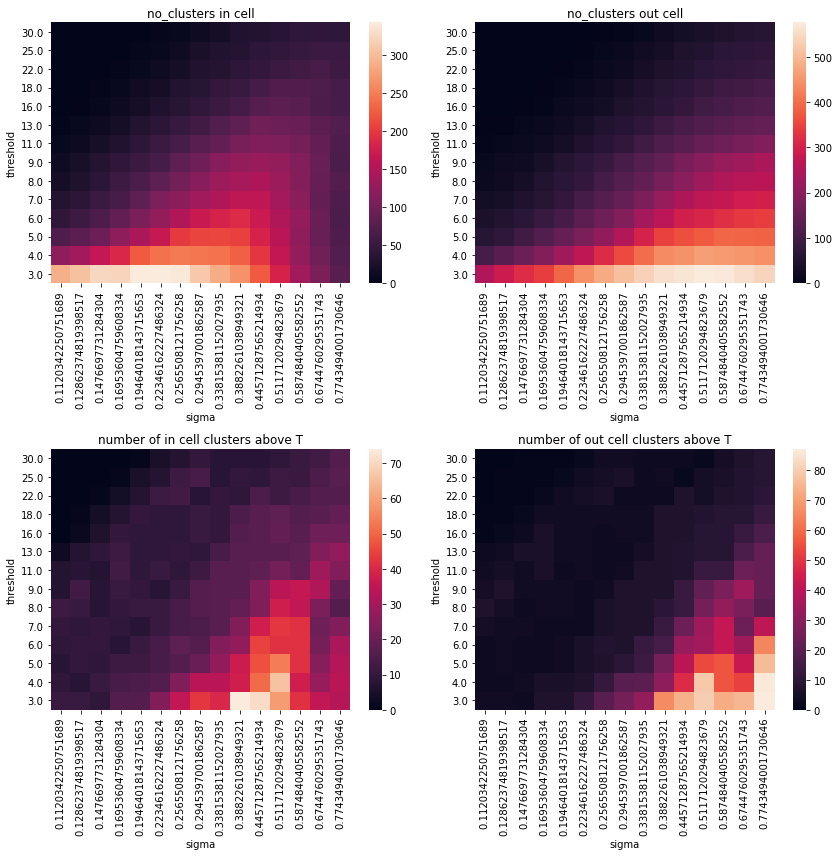

In [10]:
fig,axs = plt.subplots(2,2,figsize=(12,12));

ax = axs[0,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters in cell');

ax = axs[0,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='no_clusters_ref', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters out cell');

ax = axs[1,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('number of in cell clusters above T');

ax = axs[1,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='no_clusters_ref', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax,);
ax.invert_yaxis()
ax.set_title('number of out cell clusters above T');


plt.tight_layout()
plt.savefig(CB.save_name+"_number_of_clusters.pdf",bbox_inches="tight");